<h2> MOwNiT lab1 - Arytmetyka komputerowa </h2>



<b> Zadanie 1 </b>  Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float32, a potem rzutowana na Float64.

In [1]:
println(bits(Float32(1/3)))
println(bits(Float64(1/3)))
println(bits(Float64(Float32(1/3))))

00111110101010101010101010101011
0011111111010101010101010101010101010101010101010101010101010101
0011111111010101010101010101010101100000000000000000000000000000


<b>Zadanie 2</b> Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres, używając Gadfly zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000.0 z krokiem 1.0.

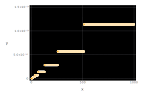

In [3]:
#Pkg.add("Gadfly")
using Gadfly
dark_panel = Theme(
    panel_fill="black",
    default_color="orange"
)
Gadfly.push_theme(dark_panel)

x = [i for i in 1.0:1000.0]
y = Float64[]

for i in x
    push!(y, eps(i))
end
plot(x=x, y=y)
    

<b>Zadanie 3</b> Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

<b>Zadanie 4</b> Wymyślić własny przykład algorytmu niestablinego numerycznie. 
1. Zademostrować wersję niestabilną, pokazać, że działa źle.
2. Wyjaśnić, dlaczego działa źle.
3. Zademonstować wersję stabilną.
4. Język dowolny.

### Obliczyć całkę: 
$I_n = \frac{1}{e}\int_{0}^{1}x^ne^x dx$ <br>
założenie: n $\ge$ 0

### I algorytm
$I_0 = \frac{1}{e}\int_{0}^{1}e^x dx = 1 - e^{-1} $ <br>
$I_n = 1 - nI_{n-1} $ <br><br>
<i>(błąd rośnie wykładniczo)</i>

In [33]:
# Obliczyć całkę I algorytmem

function f(n)
    y0 = 1 - e^(-1)
    y = 0
    for i in 1:n
       y = 1 - n * y0
       y0 = y
    end
    println(y)
end

f(10)
f(20)
f(30)
f(40)
f(70)
f(90)
f(120)
f(143)

5.412114679285578e9
6.1289425661802326e25
1.2350636805510578e44
7.347008690767148e63
8.869039935607776e128
4.731615410204086e175
1.9807695400003563e249
-1.0210705125861445e308


### II algorytm
Weźmy duże N np. N = 100 <br>
$ I_N = 0 $ <br><br>
Równanie z I algorytmu przekształćmy do postaci: <br>
$I_{n-1} = \frac{1}{n}(1 - I_n) $

<i> (błąd zbiega do 0) </i>

In [34]:
# Obliczyć całkę II algorytmem

function g(n)
    N = 200
    yN = 0
    y = Float64[]
    for i in 1:N
        yN = 1/(n)*(1-yN)
        insert!(y, 1, yN)
    end
    println(y[n])
end

f(10)
f(20)
f(30)
f(40)
f(70)
f(90)
f(120)
f(143)
        

5.412114679285578e9
6.1289425661802326e25
1.2350636805510578e44
7.347008690767148e63
8.869039935607776e128
4.731615410204086e175
1.9807695400003563e249
-1.0210705125861445e308
